In [2]:
import pandas as pd

df = pd.read_csv("../input/avocado.csv")
df["Date"] = pd.to_datetime(df["Date"])
### List the first lines of the file
df.head()



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


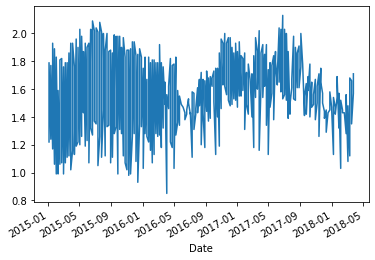

In [3]:
### List the latest lines of the file
albany_df = df [df["region"] == "Albany"] 

### Set date as index to better plot the graph
albany_df.set_index("Date", inplace=True)


albany_df["AveragePrice"].plot()

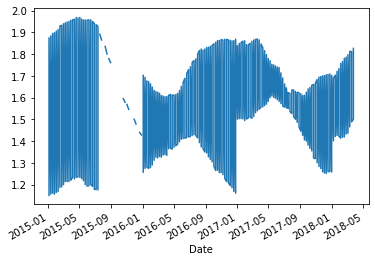

In [4]:
## Using moving average -  everyPoint - previous 24 point what is the average (Condense the fluctuations)
albany_df["AveragePrice"].rolling(25).mean().plot()

In [5]:
albany_df = albany_df.sort_index()
albany_df.index

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-11', '2015-01-11',
               '2015-01-18', '2015-01-18', '2015-01-25', '2015-01-25',
               '2015-02-01', '2015-02-01',
               ...
               '2018-02-25', '2018-02-25', '2018-03-04', '2018-03-04',
               '2018-03-11', '2018-03-11', '2018-03-18', '2018-03-18',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

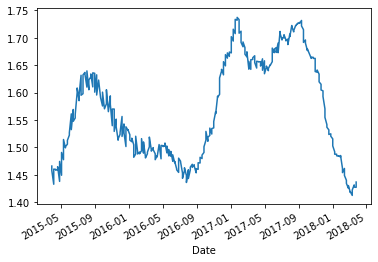

In [6]:
albany_df["AveragePrice"].rolling(25).mean().plot()

In [7]:
albany_df["price25ma"] =  albany_df["AveragePrice"].rolling(25).mean()

In [8]:
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [9]:
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [10]:
## Drop all rows that have NaN or Null values
albany_df.dropna().head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
